In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)
import matplotlib.pyplot as plt
import seaborn as sns

Partimos de datos de variables energéticas mundiales para todos los países a partir de 1980 inclusive. 
<br> Se han eliminado las filas correspondientes a regiones o continentes. 
<br> Se han imputado los valores nulos. 

In [2]:
wec = pd.read_csv(r"../datasets/wec_1980_sinreg.csv")

# Relación entre Energía per capita y GDP (PBI)

In [10]:
# Calcula la media de 'energy_per_capita' y 'gdp' por país
mean_values = wec.groupby('country').agg({'energy_per_capita': 'mean', 'primary_energy_consumption': 'mean', 
'gdp': 'mean', 'population': 'mean'}).reset_index()

# Crea un nuevo DataFrame con las medias por país
df = pd.DataFrame({'country': mean_values['country'],
                          'mean_epc': mean_values['energy_per_capita'],
                          'mean_gdp': mean_values['gdp'],
                          'mean_pec': mean_values['primary_energy_consumption'],
                          'mean_pop': mean_values['population']})

In [12]:
epc1 = mean_values.sort_values("energy_per_capita", ascending=False)

In [14]:
epc1.head(10)

,country,energy_per_capita,primary_energy_consumption,gdp,population
76,Gibraltar,877841.144675,28.873000,1.000000e+11,3.137500e+04
159,Qatar,225705.332400,227.035150,1.034355e+11,1.064475e+06
209,United States Virgin Islands,223684.883250,23.876275,1.720000e+13,1.058000e+05
205,United Arab Emirates,155922.984200,642.926775,4.384500e+11,4.462900e+06
13,Bahrain,149517.080575,120.608575,2.490023e+10,8.159000e+05
90,Iceland,117589.597000,34.658600,9.806153e+09,2.829500e+05
176,Singapore,114564.999366,508.214756,1.748523e+11,4.049976e+06
33,Canada,109242.251805,3366.701610,1.113195e+12,3.080202e+07
147,Norway,104067.727317,477.551146,2.444146e+11,4.593659e+06
197,Trinidad and Tobago,104045.742025,134.988000,2.197852e+10,1.265450e+06


In [15]:
epc1.tail(10)

,country,energy_per_capita,primary_energy_consumption,gdp,population
203,Uganda,449.820750,12.360525,3.579687e+10,2.495710e+07
36,Central African Republic,443.088400,1.575275,3.455231e+09,3.546375e+06
29,Burkina Faso,421.928975,5.785575,1.732056e+10,1.220715e+07
180,Somalia,420.614875,3.597375,5.916138e+10,9.574000e+06
163,Rwanda,403.165925,3.217650,9.508097e+09,8.208650e+06
63,Ethiopia,400.272075,30.403000,7.631270e+10,6.785545e+07
141,Niger,383.808200,4.772425,9.735979e+09,1.235445e+07
30,Burundi,201.428825,1.363200,6.871967e+09,6.988175e+06
37,Chad,134.439800,1.083025,1.205361e+10,8.963475e+06
146,Northern Mariana Islands,0.000000,0.000000,2.916270e+10,4.637838e+04


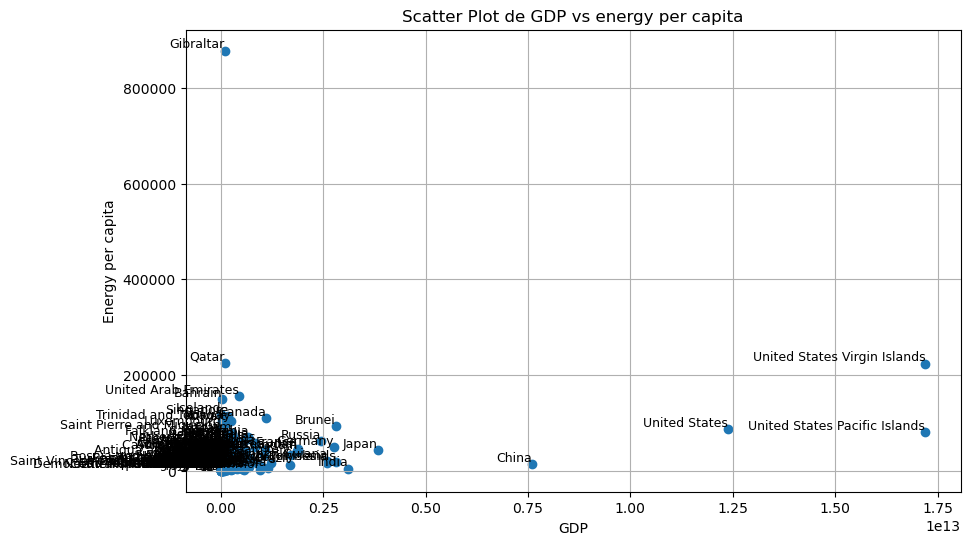

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(mean_values['gdp'], mean_values['energy_per_capita'])
for i, country in enumerate(mean_values["country"]):
    plt.text(mean_values["gdp"].iloc[i], mean_values["energy_per_capita"].iloc[i], country, fontsize=9, ha='right', va='bottom')
plt.title('Scatter Plot de GDP vs energy per capita')
plt.xlabel('GDP')
plt.ylabel('Energy per capita')
plt.grid(True)
plt.show()

In [112]:
mean_values2 = mean_values[(mean_values["country"] != "United States") & 
(mean_values["country"] != "United States Pacific Islands") &
(mean_values["country"] != "United States Virgin Islands") &
(mean_values["country"] !=  "China") &
(mean_values["country"] !=  "Gibraltar") &
(mean_values["country"] !=  "USSR")]

In [113]:
mean_values2.shape

(214, 5)

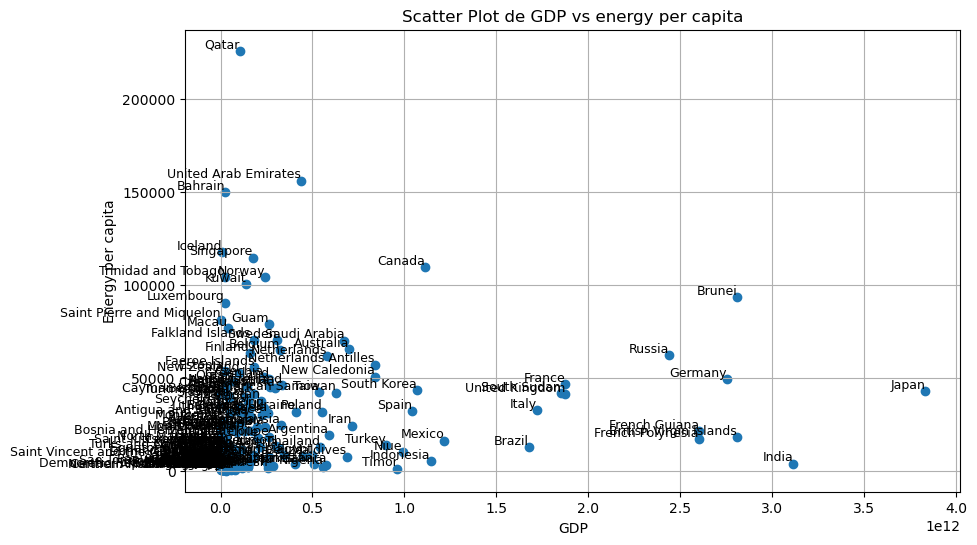

In [114]:
plt.figure(figsize=(10, 6))
plt.scatter(mean_values2['gdp'], mean_values2['energy_per_capita'])
for i, country in enumerate(mean_values2["country"]):
    plt.text(mean_values2["gdp"].iloc[i], mean_values2["energy_per_capita"].iloc[i], country, fontsize=9, ha='right', va='bottom')
plt.title('Scatter Plot de GDP vs energy per capita')
plt.xlabel('GDP')
plt.ylabel('Energy per capita')
plt.grid(True)
plt.show()

# MODELO NO SUPERVISADO

In [33]:
# Se importan las librerías que se utilizarán: 
# import pandas as pd
# import numpy as np
import sklearn
# import matplotlib.pyplot as plt
# import seaborn as sns
from sklearn.cluster import KMeans
# import re
# import array
import warnings
from sklearn.metrics import silhouette_score
warnings.filterwarnings('ignore')

Selección de features

In [115]:
features = ["gdp", "primary_energy_consumption"]
X = mean_values2[features]
# X = suram[features]
X.head(5)

,gdp,primary_energy_consumption
0,3.626833e+10,17.649525
1,1.925028e+10,36.627075
2,3.199250e+11,377.235475
3,5.340000e+11,2.109125
4,5.485567e+10,48.328450


Escalado

In [116]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X_scal = scale.fit_transform(X)

In [117]:
pd.DataFrame(X_scal).shape

(214, 2)

### Método del codo 

In [118]:
#Se realiza el método del codo para determinar la cantidad de clusters
k=np.arange(1,11)
lista_inercias = []
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=0) 
# Instancia la clase KMeans
    kmeans.fit(X_scal)  
# Ajusta el modelo KMeans a tus datos x
    lista_inercias.append(kmeans.inertia_)

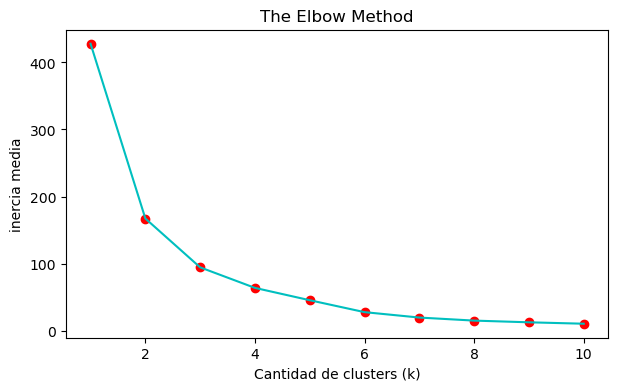

In [119]:
# Se grafica el método del codo
plt.figure(figsize=(7, 4))
plt.plot(k, lista_inercias, color='c')
plt.scatter(k, lista_inercias, c='r')
plt.xlabel('Cantidad de clusters (k)')
plt.ylabel('inercia media')
plt.title('The Elbow Method')
plt.show()

### Método Silhouette 

In [120]:
# Se realiza la evaluación con silhoutte
sil = []
kmax = 11

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 3
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k).fit(X_scal)
    labels = kmeans.labels_
    sil.append(silhouette_score(X_scal, labels, metric='euclidean'))

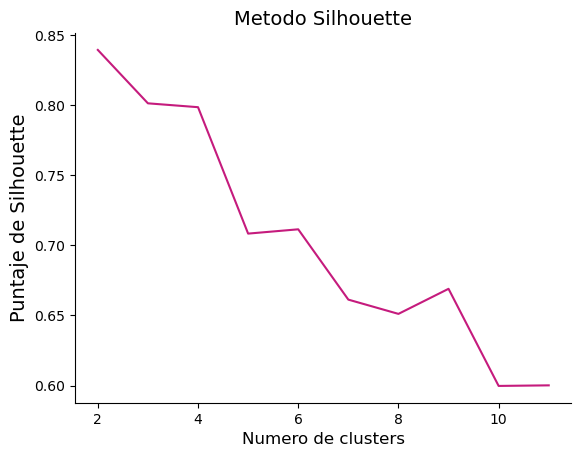

In [121]:
# Se grafica
plt.plot(range(2,12),sil, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Metodo Silhouette', size=14)
plt.xlabel('Numero de clusters', size=12)
plt.ylabel('Puntaje de Silhouette', size=14)
plt.show()

2 clusters

In [122]:
# Se instancia el modelo con el numero de clusters 
kmeansmodel2 = KMeans(n_clusters=2, random_state=0)
kmeansmodel2.fit(X_scal)
# Etiquetas de los clusters
etiquetas_2 = kmeansmodel2.labels_
np.unique(etiquetas_2)
# Se hace la predicción:
y_means2=kmeansmodel2.fit_predict(X_scal)

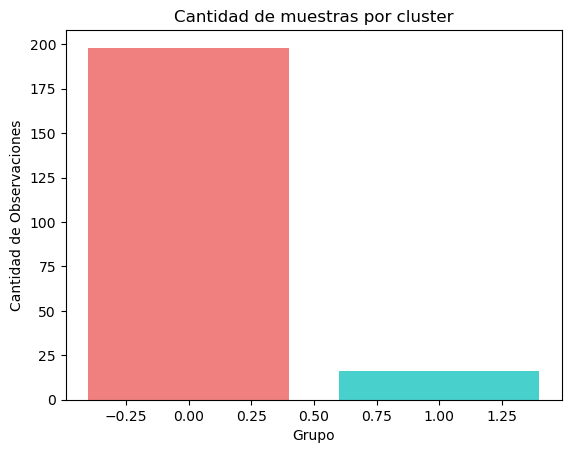

In [123]:
# cantidad de observaciones por cluster
cluster_counts = np.bincount(y_means2)
cluster_labels = list(range(len(cluster_counts)))
colors = ['lightcoral', 'mediumturquoise', 'plum']
plt.bar(cluster_labels, cluster_counts, color=colors)
plt.title('Cantidad de muestras por cluster')
plt.xlabel('Grupo')
plt.ylabel('Cantidad de Observaciones')
plt.show()

In [124]:
# Se instancia el modelo con el numero de clusters 
kmeansmodel3 = KMeans(n_clusters=3, random_state=0)
kmeansmodel3.fit(X_scal)
# Etiquetas de los clusters
etiquetas_3 = kmeansmodel3.labels_
np.unique(etiquetas_3)
# Se hace la predicción:
y_means3=kmeansmodel3.fit_predict(X_scal)

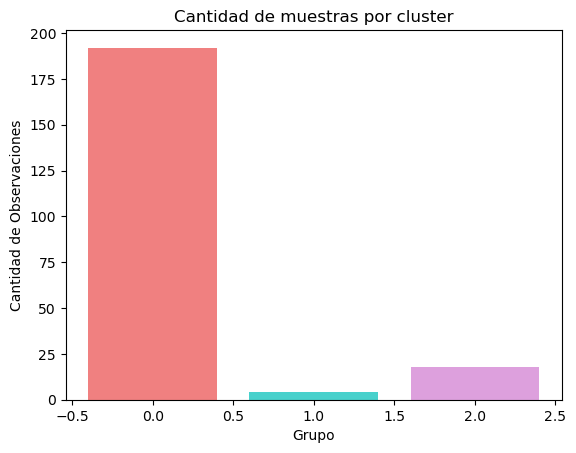

In [126]:
# cantidad de observaciones por cluster
cluster_counts = np.bincount(y_means3)
cluster_labels = list(range(len(cluster_counts)))
colors = ['lightcoral', 'mediumturquoise', 'plum']
plt.bar(cluster_labels, cluster_counts, color=colors)
plt.title('Cantidad de muestras por cluster')
plt.xlabel('Grupo')
plt.ylabel('Cantidad de Observaciones')
plt.show()

In [127]:
# Se observan las coordenandas de los centroides
centroids3 =kmeansmodel3.cluster_centers_
print(centroids3)

[[-0.2842014  -0.23054759]
 [ 4.41153944  5.66877737]
 [ 2.05113952  1.19944594]]


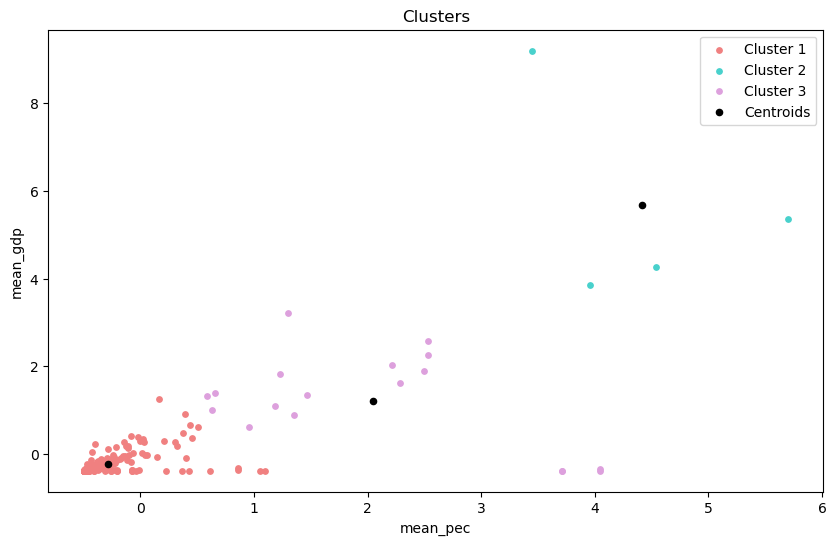

In [128]:
plt.figure(figsize=(10, 6))
plt.scatter(X_scal[y_means3 == 0, 0], X_scal[y_means3 == 0, 1], s = 15, c = 'lightcoral', label = 'Cluster 1')
plt.scatter(X_scal[y_means3 == 1, 0], X_scal[y_means3 == 1, 1], s = 15, c = 'mediumturquoise', label = 'Cluster 2')
plt.scatter(X_scal[y_means3 == 2, 0], X_scal[y_means3 == 2, 1], s = 15, c = 'plum', label = 'Cluster 3')
plt.scatter(kmeansmodel3.cluster_centers_[:, 0], kmeansmodel3.cluster_centers_[:, 1], s = 20, c = 'black', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('mean_pec')
plt.ylabel('mean_gdp')
plt.legend()
plt.show()

In [130]:
# Se instancia el modelo con el numero de clusters 
kmeansmodel4 = KMeans(n_clusters=4, random_state=0)
kmeansmodel4.fit(X_scal)
# Etiquetas de los clusters
etiquetas_4 = kmeansmodel4.labels_
np.unique(etiquetas_4)
# Se hace la predicción:
y_means4=kmeansmodel4.fit_predict(X_scal)

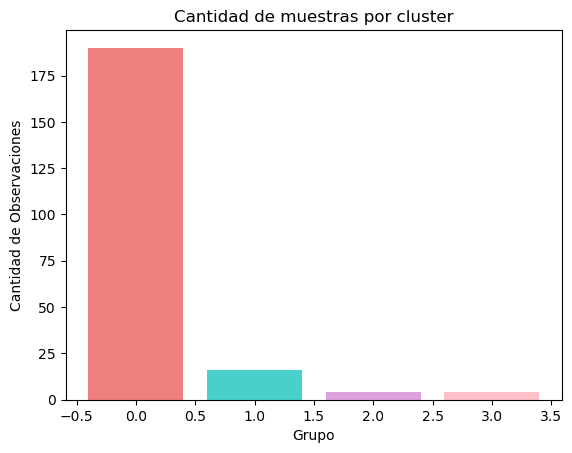

In [135]:
# cantidad de observaciones por cluster
cluster_counts = np.bincount(y_means4)
cluster_labels = list(range(len(cluster_counts)))
colors = ['lightcoral', 'mediumturquoise', 'plum', "pink"]
plt.bar(cluster_labels, cluster_counts, color=colors)
plt.title('Cantidad de muestras por cluster')
plt.xlabel('Grupo')
plt.ylabel('Cantidad de Observaciones')
plt.show()

In [134]:
# Se observan las coordenandas de los centroides
centroids4 =kmeansmodel4.cluster_centers_
print(centroids4)

[[-0.29012155 -0.24438743]
 [ 1.37307083  1.57729254]
 [ 3.87695069 -0.36954458]
 [ 4.41153944  5.66877737]]


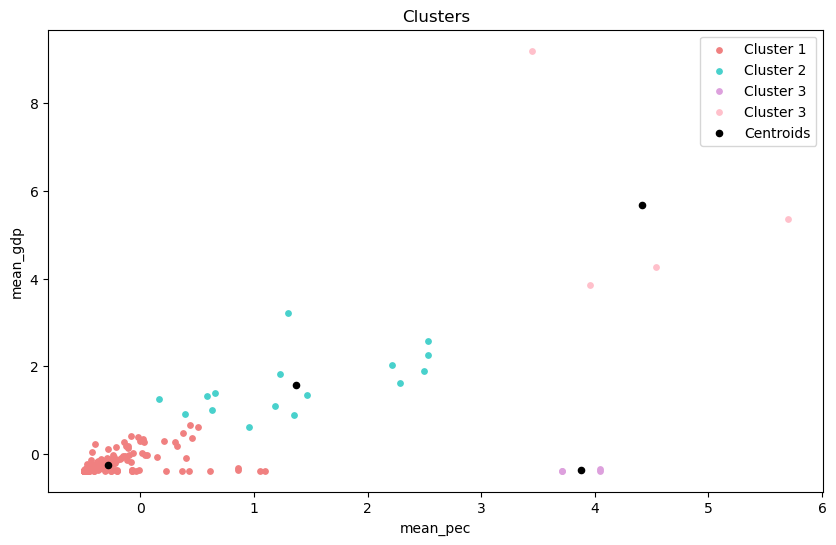

In [136]:
plt.figure(figsize=(10, 6))
plt.scatter(X_scal[y_means4 == 0, 0], X_scal[y_means4 == 0, 1], s = 15, c = 'lightcoral', label = 'Cluster 1')
plt.scatter(X_scal[y_means4 == 1, 0], X_scal[y_means4 == 1, 1], s = 15, c = 'mediumturquoise', label = 'Cluster 2')
plt.scatter(X_scal[y_means4 == 2, 0], X_scal[y_means4 == 2, 1], s = 15, c = 'plum', label = 'Cluster 3')
plt.scatter(X_scal[y_means4 == 3, 0], X_scal[y_means4 == 3, 1], s = 15, c = 'pink', label = 'Cluster 3')
plt.scatter(kmeansmodel4.cluster_centers_[:, 0], kmeansmodel4.cluster_centers_[:, 1], s = 20, c = 'black', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('mean_pec')
plt.ylabel('mean_gdp')
plt.legend()
plt.show()

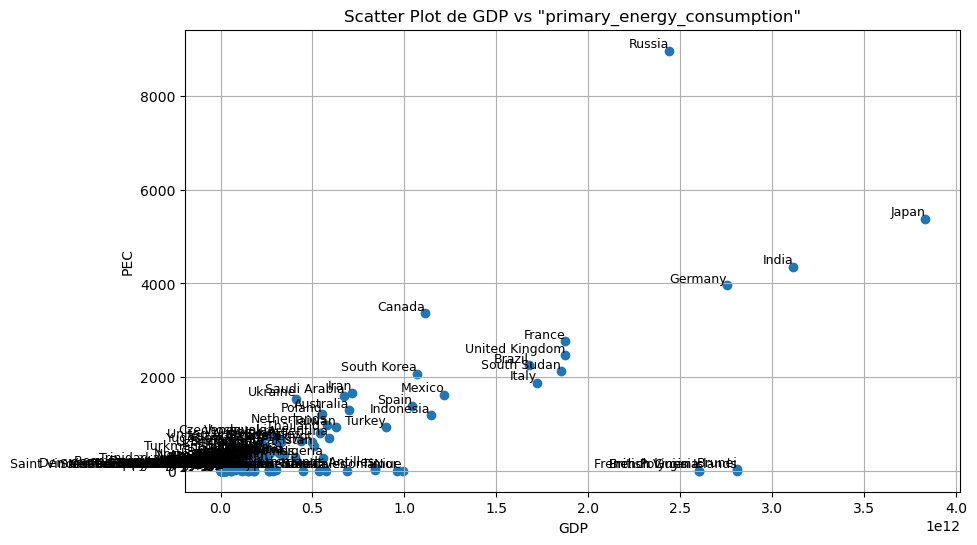

In [129]:
# Graficar el scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(mean_values2['gdp'], mean_values2["primary_energy_consumption"])
for i, country in enumerate(mean_values2["country"]):
    plt.text(mean_values2["gdp"].iloc[i], mean_values2["primary_energy_consumption"].iloc[i], country, fontsize=9, ha='right', va='bottom')
plt.title('Scatter Plot de GDP vs "primary_energy_consumption"')
plt.xlabel('GDP')
plt.ylabel('PEC')
plt.grid(True)
plt.show()

In [137]:
features = ["gdp", "energy_per_capita", "primary_energy_consumption" , "population"]
# features = ["gdp", "primary_energy_consumption"]
X = mean_values2[features]
# X = suram[features]
X.head(5)

,gdp,energy_per_capita,primary_energy_consumption,population
0,3.626833e+10,851.131425,17.649525,21958825.0
1,1.925028e+10,12210.113550,36.627075,3026025.0
2,3.199250e+11,12039.368300,377.235475,30730125.0
3,5.340000e+11,42207.508000,2.109125,51425.0
4,5.485567e+10,2505.437650,48.328450,17583950.0


In [138]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X_scal = scale.fit_transform(X)

In [139]:
pd.DataFrame(X_scal).shape

(214, 4)

### Método del codo 

In [140]:
#Se realiza el método del codo para determinar la cantidad de clusters
k=np.arange(1,11)
lista_inercias = []
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=0) 
# Instancia la clase KMeans
    kmeans.fit(X_scal)  
# Ajusta el modelo KMeans a tus datos x
    lista_inercias.append(kmeans.inertia_)

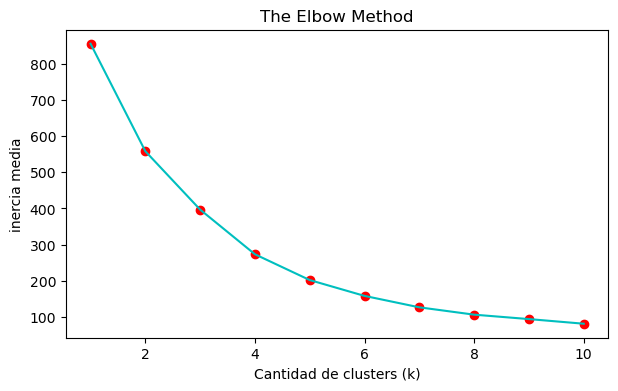

In [141]:
# Se grafica el método del codo
plt.figure(figsize=(7, 4))
plt.plot(k, lista_inercias, color='c')
plt.scatter(k, lista_inercias, c='r')
plt.xlabel('Cantidad de clusters (k)')
plt.ylabel('inercia media')
plt.title('The Elbow Method')
plt.show()

### Método Silhouette 

In [142]:
# Se realiza la evaluación con silhoutte
sil = []
kmax = 11

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 3
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k).fit(X_scal)
    labels = kmeans.labels_
    sil.append(silhouette_score(X_scal, labels, metric='euclidean'))

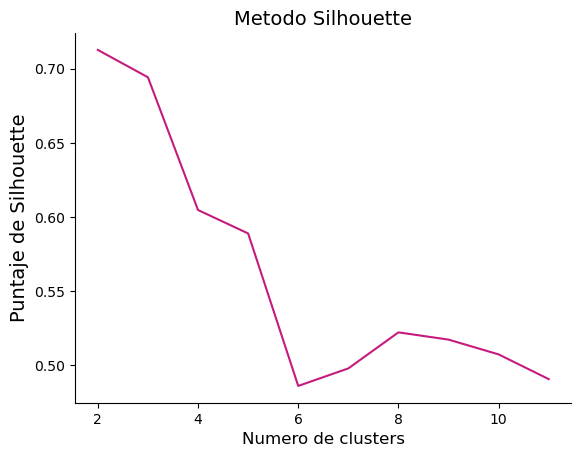

In [143]:
# Se grafica
plt.plot(range(2,12),sil, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Metodo Silhouette', size=14)
plt.xlabel('Numero de clusters', size=12)
plt.ylabel('Puntaje de Silhouette', size=14)
plt.show()

In [144]:
# Se instancia el modelo con el numero de clusters 
kmeansmodel2 = KMeans(n_clusters=8, random_state=0)
kmeansmodel2.fit(X_scal)
# Etiquetas de los clusters
etiquetas_2 = kmeansmodel2.labels_
np.unique(etiquetas_2)
# Se hace la predicción:
y_means2=kmeansmodel2.fit_predict(X_scal)

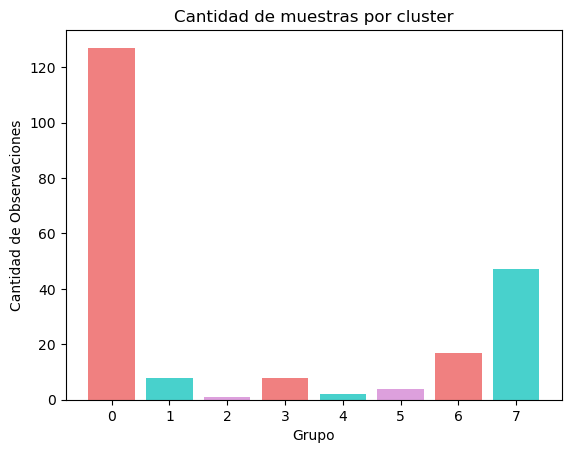

In [145]:
# cantidad de observaciones por cluster
cluster_counts = np.bincount(y_means2)
cluster_labels = list(range(len(cluster_counts)))
colors = ['lightcoral', 'mediumturquoise', 'plum']
plt.bar(cluster_labels, cluster_counts, color=colors)
plt.title('Cantidad de muestras por cluster')
plt.xlabel('Grupo')
plt.ylabel('Cantidad de Observaciones')
plt.show()

In [146]:
# Se observan las coordenandas de los centroides
centroids2 =kmeansmodel2.cluster_centers_
print(centroids2)

[[-0.38845836 -0.52258745 -0.32105375 -0.16261447]
 [ 2.31690513  0.72365129  2.4074071   0.55985195]
 [ 4.5383383  -0.65805072  4.27092658 13.38291395]
 [-0.26802923  3.50634943 -0.06013541 -0.24814971]
 [ 4.57565241  0.8959487   7.27882142  1.48141754]
 [ 3.87695069  0.41541785 -0.36954458 -0.27649355]
 [ 0.59655371 -0.36640577  0.45310228  0.70556134]
 [-0.13607776  0.76514852 -0.0650527  -0.1931042 ]]


In [149]:
# Transformar los centroides escalados a la escala original
centroids_original = scale.inverse_transform(centroids2)

In [151]:
# features = ["gdp", "energy_per_capita", "primary_energy_consumption" , "population"]

centroids_original

array([[7.02732251e+10, 8.07605681e+03, 5.50519493e+01, 8.94401906e+06],
       [1.74136585e+12, 4.70104611e+04, 2.61210441e+03, 6.45084631e+07],
       [3.11353659e+12, 3.84397707e+03, 4.35855317e+03, 1.05072219e+09],
       [1.44661835e+11, 1.33946206e+05, 2.99578785e+02, 2.36555739e+06],
       [3.13658537e+12, 5.23932956e+04, 7.17748490e+03, 1.35385500e+08],
       [2.70500000e+12, 3.73807769e+04, 9.60743125e+00, 1.85650000e+05],
       [6.78711397e+11, 1.29554114e+04, 7.80573666e+02, 7.57148816e+07],
       [2.26167752e+11, 4.83068980e+04, 2.94970412e+02, 6.59907314e+06]])

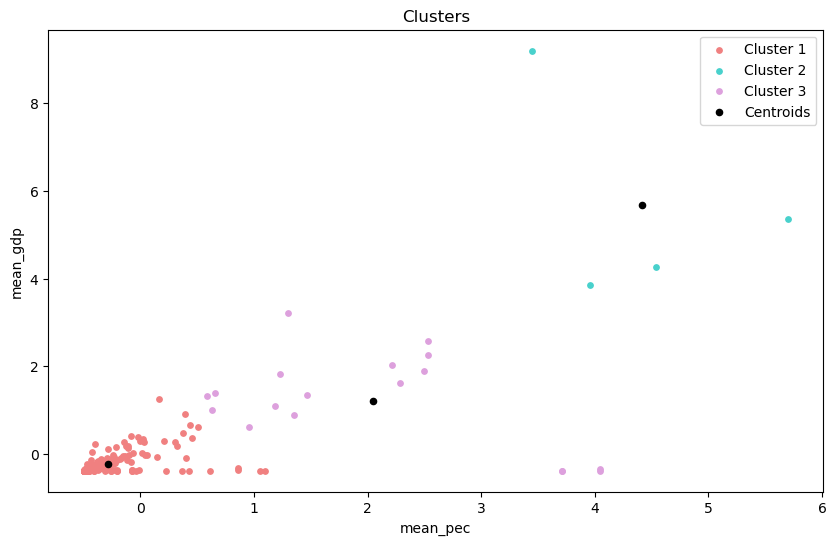

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_scal[y_means3 == 0, 0], X_scal[y_means3 == 0, 1], s = 15, c = 'lightcoral', label = 'Cluster 1')
plt.scatter(X_scal[y_means3 == 1, 0], X_scal[y_means3 == 1, 1], s = 15, c = 'mediumturquoise', label = 'Cluster 2')
plt.scatter(X_scal[y_means3 == 2, 0], X_scal[y_means3 == 2, 1], s = 15, c = 'plum', label = 'Cluster 3')
plt.scatter(kmeansmodel3.cluster_centers_[:, 0], kmeansmodel3.cluster_centers_[:, 1], s = 20, c = 'black', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('mean_pec')
plt.ylabel('mean_gdp')
plt.legend()
plt.show()

In [147]:
from sklearn.metrics import calinski_harabasz_score

kmeans = KMeans(n_clusters=8)
kmeans.fit(X_scal)
calinski_harabasz = calinski_harabasz_score(X_scal, etiquetas_2)


In [148]:
calinski_harabasz

208.77501670935447